In [19]:
from GGMS.solvers import *
from GGMS.spd_generators import *
from GGMS.stat_funcs import *
from GGMS.experimenting import *
from GGMS.metrics import *
import matplotlib.pyplot as plt
import pickle
import multiprocessing as mp

In [34]:
with open('data/data/latest_chol100.bin', 'rb') as f:
    density_frames = pickle.load(f)

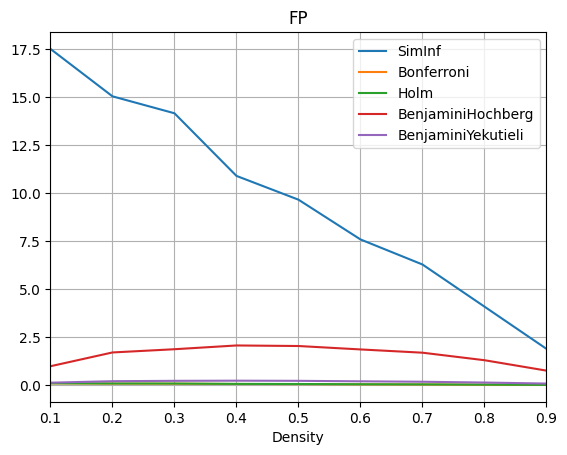

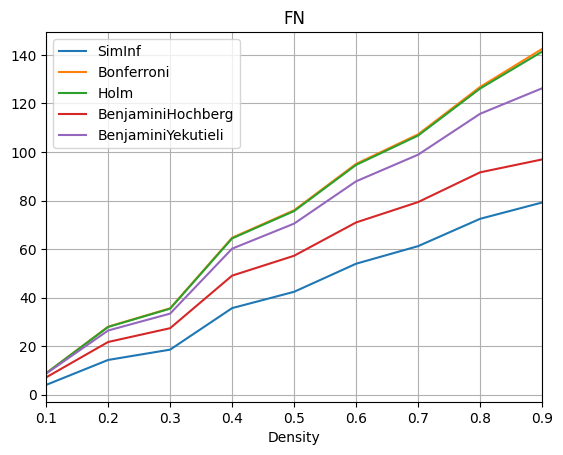

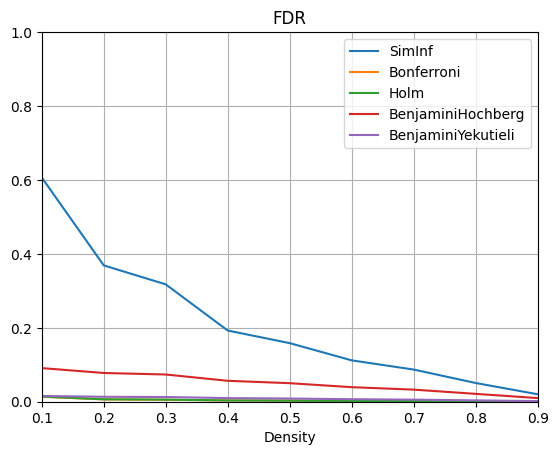

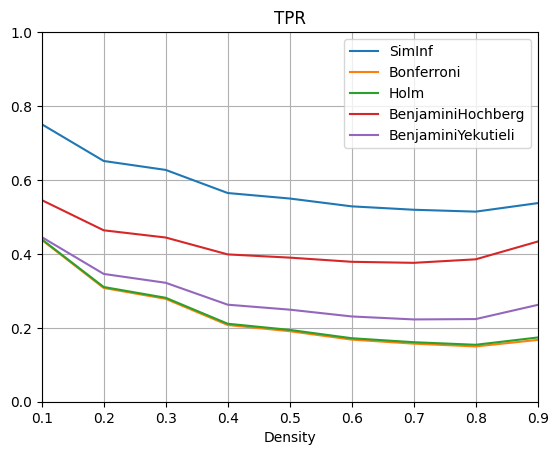

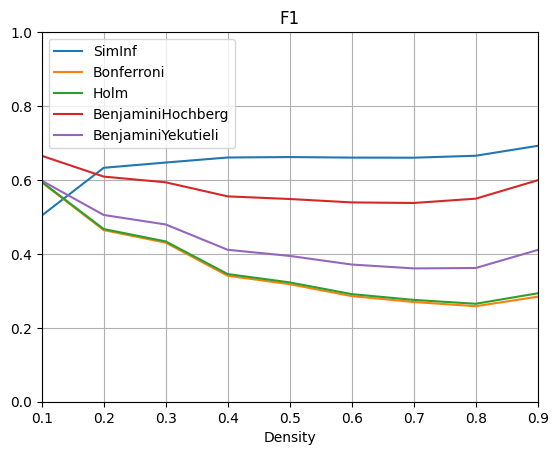

In [35]:
# fig, axes = plt.subplots(1, 5)
# axes = axes.flatten()
x = np.arange(0.1, 1, 0.1)

for idx, metric in enumerate(density_frames[0].columns):
    density_df = pd.concat([density_frame[metric] for density_frame in density_frames], axis=1).T
    density_df

    for method in density_frames[0].index:
        plt.plot(x, density_df[method], label=method)
    plt.legend()
    plt.title(metric)
    plt.xlabel('Density')
    plt.xlim(0.1, 0.9)
    if idx > 1:
        plt.ylim(0, 1)
    plt.grid(True)
    plt.show()
#fig.set_size_inches((25, 7))

In [36]:
density_frames[-1]

,FP,FN,FDR,TPR,F1
SimInf,1.886550,79.174380,0.020150,0.537337,0.692395
Bonferroni,0.009480,142.493765,0.000317,0.167249,0.284131
Holm,0.011365,141.374890,0.000361,0.173774,0.293382
BenjaminiHochberg,0.753640,96.929725,0.009810,0.433385,0.599192
BenjaminiYekutieli,0.080665,126.264295,0.001672,0.261992,0.410614
